In [13]:
import numpy as np
from scipy.optimize import minimize


def f(e,a, b, c, d, t):
    return e*t**4+a * t**3 + b * t**2 + c * t + d

def f_prime(e,a, b, c, d, t):
    return  4*e*t**3+3*a*(t**2) + 2*b*t + c

def f_double_prime(e,a, b, c, d, t):
    return  4*3*e*t**2+3*2*a*t+2*b


# Differential equation parameters
ws = 376.9911
# Boundary condition 
coefii = 10

# del_0 = 0  #del
# omega_0 = 0     #w
del_0_v = -1/coefii
omega_0_v = 383.9911/coefii

K1 = 5/coefii
K2 = 10/coefii
K3 = 1.7/coefii
ws = ws/coefii
def DE(f,f_prime,f_double_prime,t):
    delta = f
    delta_prime = f_prime
    omega = delta_prime+ws
    omega_prime = f_double_prime
    return (delta_prime+ws-omega)+omega_prime-K1+K2*np.sin(coefii*delta)+K3*(-ws+omega)*coefii
    


t_data = np.linspace(0, 0.2, 10)
print(t_data)
# del_target_values = [-0.1, -0.08568864375010266, -0.07135199292327042, -0.05703216366155178, -0.04277533332758968, -0.028630566403092566, -0.014648393492369936, -0.0008786099410683636, 0.012629993562057113, 0.025830965225360485, 0.03868190003112095, 0.05114514907683676, 0.06318818053413534, 0.07478349631699908, 0.08590929364185632, 0.09655108128205876, 0.10669910851327256, 0.11634802541217151, 0.12549688285643618, 0.13414913252475494, 0.1423124546002818, 0.14999727816970396, 0.1572170147933966, 0.16398646160587024, 0.17032150117763253, 0.17623910151518826, 0.18175731606103976, 0.18689528211221512, 0.19167252338163385, 0.1961073022258, 0.2002172705183872, 0.2040196495808423, 0.20753123018238517, 0.21076837254000894, 0.21374700631847987, 0.2164826306303374, 0.21899031403589397, 0.22128469454323552, 0.2233792634241711, 0.22528520015009165, 0.22701309424038968, 0.22857304585789437, 0.22997466468065175, 0.2312270699019247, 0.23233889023019288, 0.23331826388915283, 0.23417283861771784, 0.2349097716700181, 0.2355355471757422, 0.23605508170803655]
# omega_target_values = [38.39911, 38.40131255162024, 38.401559501400065, 38.399627615014815, 38.39535272010845, 38.38863569037213, 38.37944575798523, 38.36781828175373, 38.35385457506316, 38.33771250498817, 38.31960064799821, 38.29975795463622, 38.27844654658136, 38.25594953663366, 38.232548774138536, 38.20852344187769, 38.184133101993716, 38.15961422638989, 38.135180196730154, 38.11102130443908, 38.0873045267779, 38.0641648590319, 38.04170495996719, 38.020008128295665, 37.999139183467754, 37.979144465672405, 37.96005183583712, 37.94187079269068, 37.92460193204962, 37.90823330461032, 37.892744190413474, 37.87811073974539, 37.864305973137945, 37.851299781368624, 37.83905892546051, 37.82754703668229, 37.816724616548235, 37.80654903681822, 37.7969789305147, 37.78797953688034, 37.779515522995986, 37.77155243468513, 37.76405670589686, 37.75699565870589, 37.75033750331248, 37.744051338042496, 37.73810714934741, 37.73247581180426, 37.72712975291509, 37.7220465421391]
del_target_values = [-0.1, -0.08441470937506322, -0.0688037423854327, -0.053222192928088295, -0.03773062311181606, -0.02239321114539309, -0.007274950946655793, 0.007560493585276482, 0.02205150309138274, 0.036141699867384636]
omega_target_values = [38.39911, 38.40141738637016, 38.40138078522379, 38.39872210442563, 38.39324723381016, 38.3848559990875, 38.37354286389266, 38.35939520883024, 38.34258932254494, 38.323369741858244]


def callbackF(parameters):
    # global current_loss

    print("Current loss:", loss(parameters)) 


def loss(params):
    e,a, b, c, d = params
    
    u = f(e,a, b, c, d,t_data)
    u_prime = f_prime(e,a, b, c, d,t_data)
    u_double_prime = f_double_prime(e,a, b, c, d,t_data)

    loss_i = np.sum((DE(f=u,f_prime=u_prime,f_double_prime=u_double_prime,t=t_data))**2)
    # loss_i = np.sum(np.abs(DE(f=u,f_prime=u_prime,f_double_prime=u_double_prime,t=t_data)))

    eta = 5
    del0_pred = f(e,a, b, c, d, 0)
    omega0_pred = f_prime(e,a, b, c, d, 0) + ws
    loss_b = eta * (del_0_v - del0_pred) ** 2 * len(t_data)
    loss_b += eta * (omega_0_v - omega0_pred) ** 2 * len(t_data)

    # loss = 10*loss_i+8*loss_b
    loss = loss_i+loss_b
    # loss = loss_i
    # print("Current loss:", loss) 
    return loss



initial_params = [1, 2, 3,4,10]
# initial_params = [4, 4, 4,4,4]
# initial_params = [10, 20, 8,70,10]

# initial_params =[ 0.21645784541519306 , -0.27528503464752174 , -0.3942046207489512 , 0.7929274829400202 , -0.10387968535112888 ]
# initial_params = [ 1.4153666118726564 , -2.588337847411979 , 1.0053578459688937 , 0.5154852453848594 , -0.09352870871936723 ]

# initial_params = [ 0.1907291345065916 , -0.2189300030065154 , -0.43360545510065646 , 0.8022468599628725 , -0.10433114302138036 ]

# result = minimize(loss, initial_params, method='Nelder-Mead')
result = minimize(loss, initial_params, callback=callbackF, method='BFGS', options={'gtol': 1E-2})

e,a, b, c,d = result.x


print("Optimized e:", e)
print("Optimized a:", a)
print("Optimized b:", b)
print("Optimized c:", c)
print("Optimized d:", d)

[0.         0.02222222 0.04444444 0.06666667 0.08888889 0.11111111
 0.13333333 0.15555556 0.17777778 0.2       ]
Current loss: 2367.4722219465607
Current loss: 2008.0945673686251
Current loss: 1937.6766038146616
Current loss: 1816.370696676755
Current loss: 1593.3866143776977
Current loss: 1273.5077654883682
Current loss: 1101.513961233524
Current loss: 1019.421649669138
Current loss: 906.642349938324
Current loss: 816.2017337735806
Current loss: 631.0335670013858
Current loss: 515.7297714244411
Current loss: 452.4765879860656
Current loss: 416.927631995225
Current loss: 230.84137503237275
Current loss: 221.19605652471833
Current loss: 202.75690775185947
Current loss: 169.65211048133287
Current loss: 122.85632587650348
Current loss: 112.46274072421653
Current loss: 107.64840924125485
Current loss: 100.12088229990562
Current loss: 91.120074744543
Current loss: 80.05013491908572
Current loss: 72.82950756428235
Current loss: 63.29316577235931
Current loss: 61.37101775002671
Current loss: 

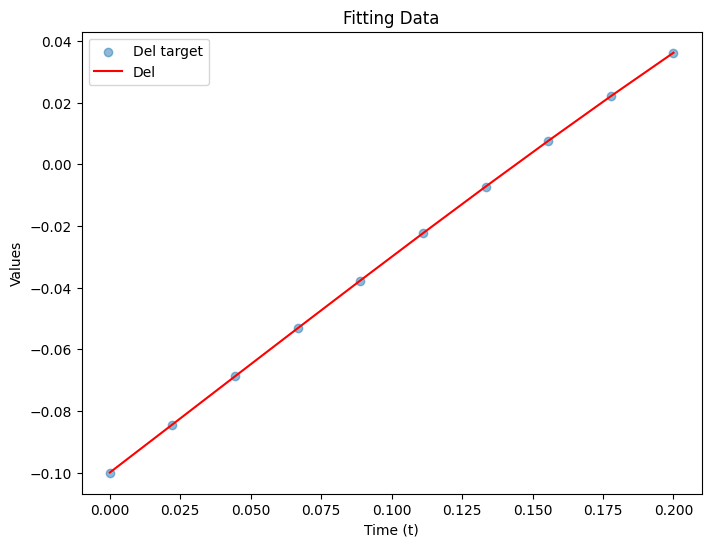

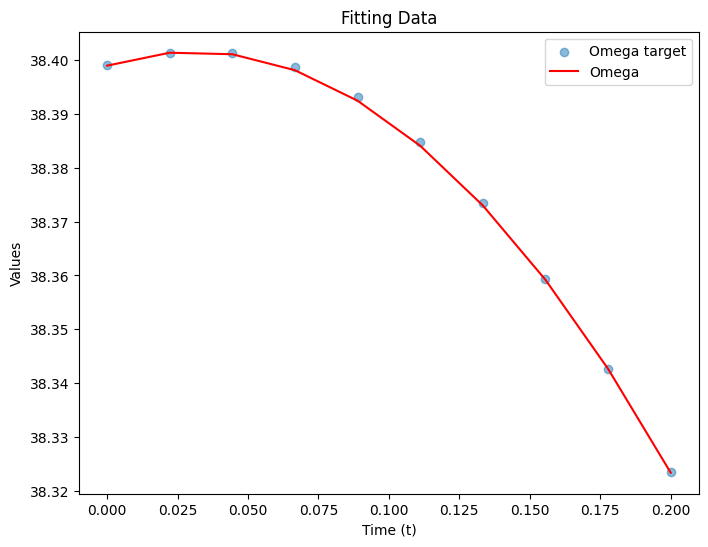

In [14]:
import matplotlib.pyplot as plt

# Plot the target values and the fitted curve
plt.figure(figsize=(8, 6))
plt.scatter(t_data, del_target_values, label='Del target', alpha=0.5)
fitted_values = f(e,a, b, c, d,t_data)
plt.plot(t_data, fitted_values, 'r', label='Del')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')


# Plot the target values and the fitted curve
# plt.figure(figsize=(8, 6))
plt.scatter(t_data, omega_target_values, label='Omega target', alpha=0.5)
fitted_values = f_prime(e,a, b, c, d,t_data)+ws
plt.plot(t_data, fitted_values, 'r', label='Omega')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.legend()
plt.title('Fitting Data')
plt.show()

plt.show()
